In [754]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
words =  open("src/names.txt").read().splitlines()

In [1157]:
chars = sorted(list(set(''.join(words))))

In [1158]:
stoi = {ch : i + 1 for i, ch in enumerate(chars)}
last = len(stoi)
stoi['.'] = 0
itos = {i: ch for ch,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [1161]:
N = torch.zeros((len(stoi), len(stoi)), dtype=torch.short)

In [1163]:
for w in words:
    w = ['.']  + list(w) + ['.']
    for ch1, ch2 in zip(w,w[1:]):
        idx1, idx2 = stoi[ch1], stoi[ch2]
        N[idx1, idx2 ] = N[idx1, idx2 ] + 1

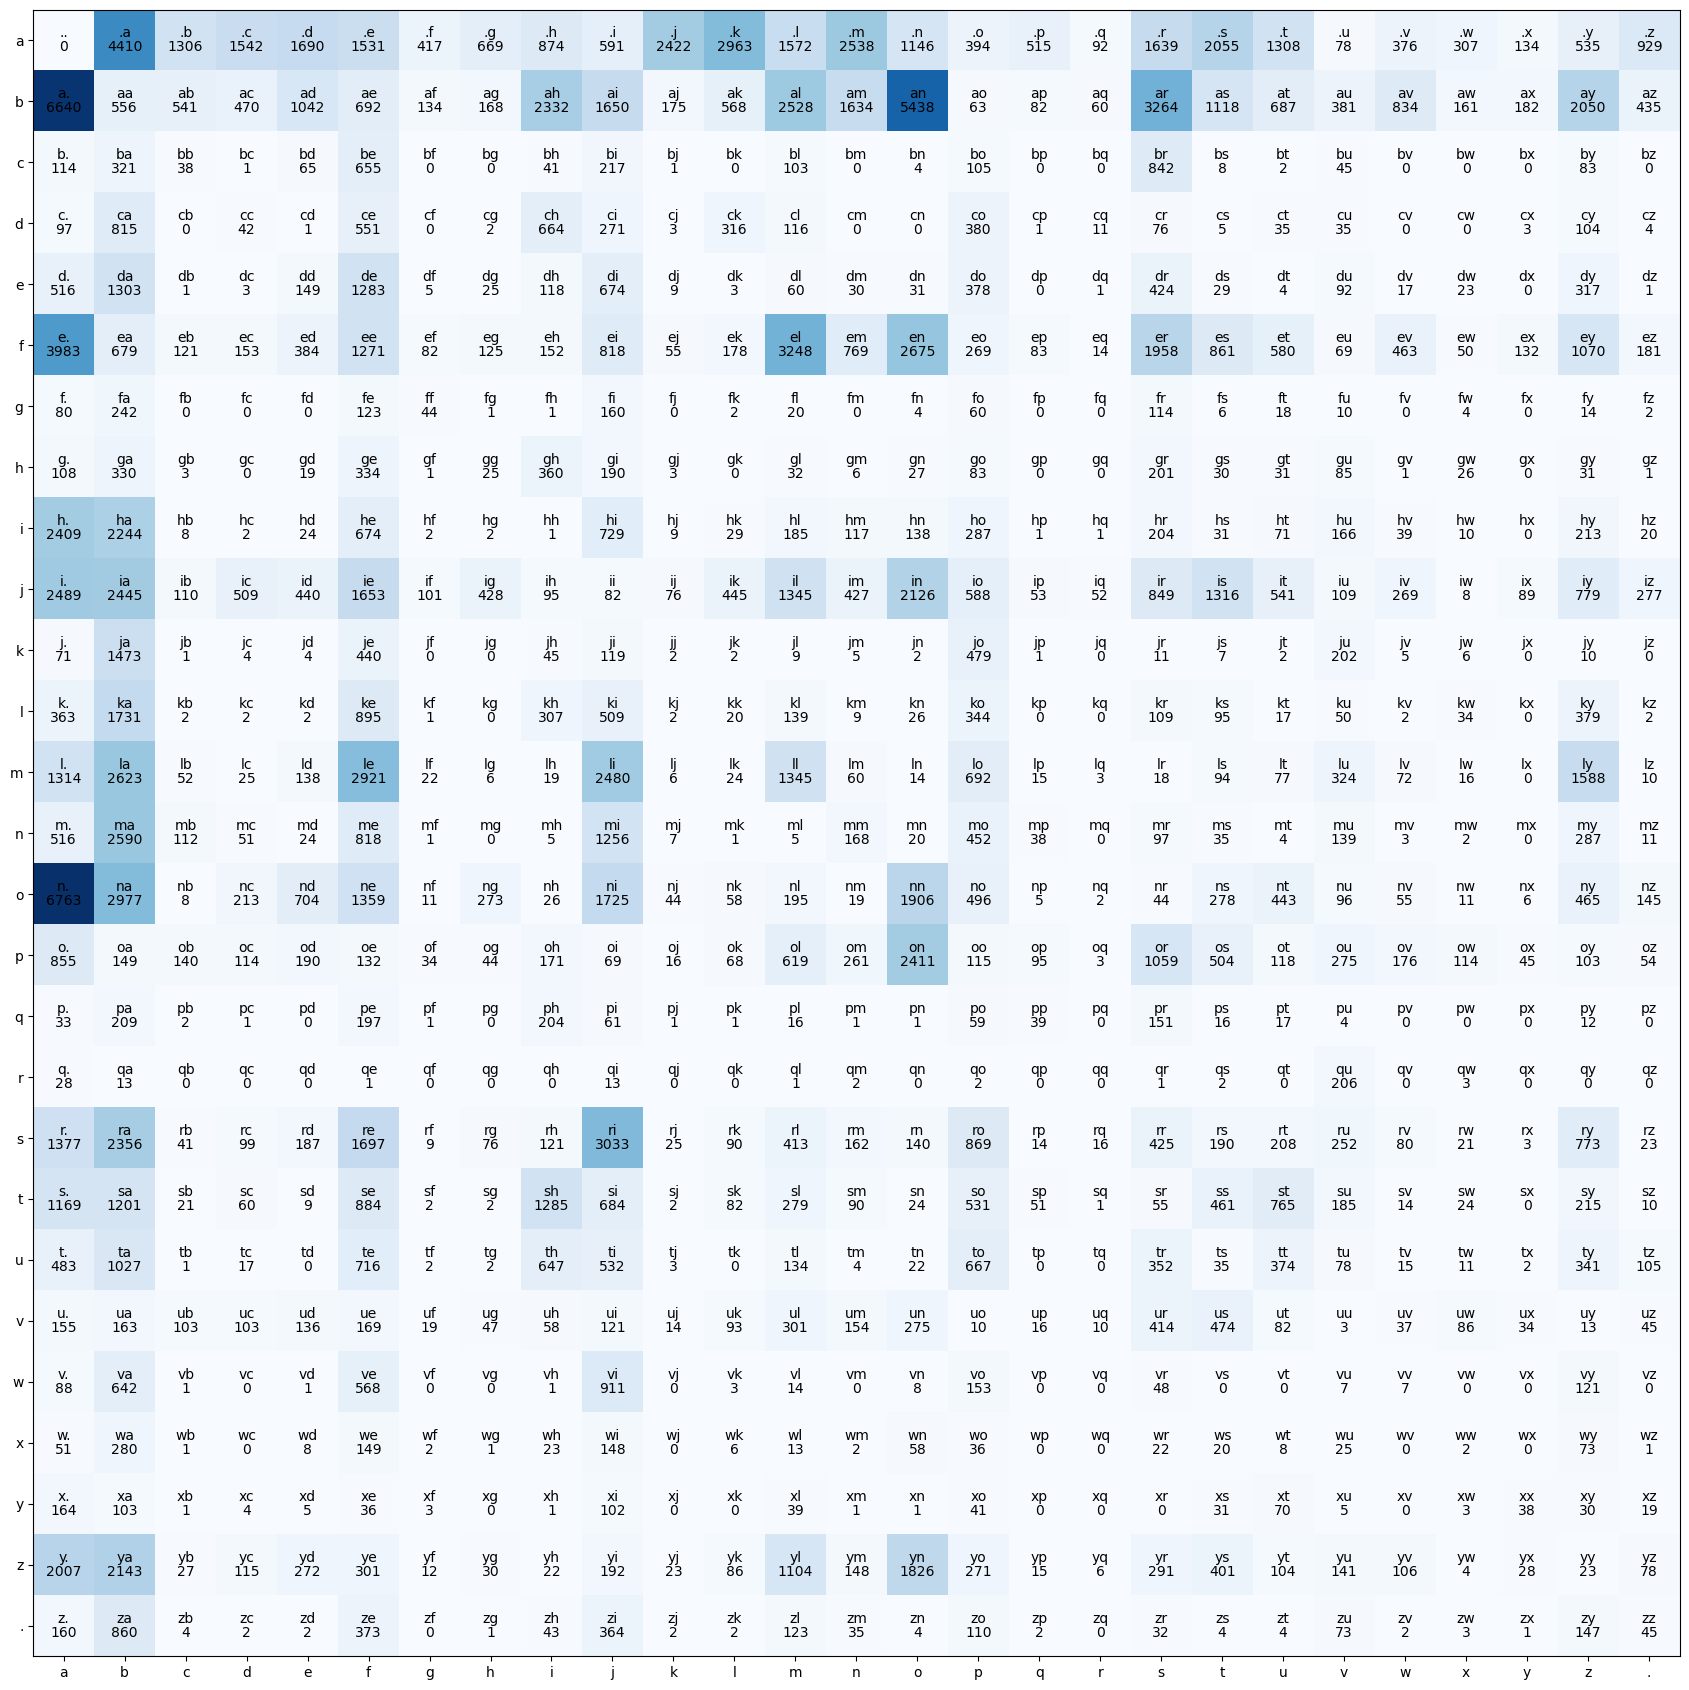

In [1132]:
fig, ax = plt.subplots(figsize=(17,17))
im = ax.imshow(N, cmap='Blues')
ax.set_xticks(range(len(stoi)), labels=stoi)
ax.set_yticks(range(len(stoi)), labels=stoi)

for i in range(len(stoi)):
    for j in range(len(stoi)):
        ch = itos[i] + itos[j]
        ax.text(j,i,ch, ha="center", va="bottom")
        ax.text(j,i,N[i,j].item(), ha="center", va="top")

fig.tight_layout()


In [1153]:
P = (N+1).float()
P = P / P.sum(1, keepdim=True)

In [1154]:
g =  torch.Generator().manual_seed(2147483647)

for i in range(20):
    idx = 0
    out = []
    while True :

        p = P[idx]
        idx = torch.multinomial(p,num_samples=1,replacement=True, generator=g).item()
        out.append(itos[idx])
        if idx == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


In [1122]:
loglikelihood = 0

n = 0 

for w in words:
    w = ['.']  + list(w) + ['.']
    for ch1, ch2 in zip(w,w[1:]):
        idx1, idx2 = stoi[ch1], stoi[ch2]
        prob = P[idx1, idx2]
        logprob = torch.log(prob)
        loglikelihood += logprob
        n += 1

neg_loglikelihood = - loglikelihood / n
neg_loglikelihood

tensor(2.4544)

In [764]:
## NN approach

In [1201]:
import torch.nn.functional as F

xs, ys = [],[]

for w in words:
    w = ['.']  + list(w) + ['.']
    for ch1, ch2 in zip(w,w[1:]):
        idx1, idx2 = stoi[ch1], stoi[ch2]
        xs.append(idx1)
        ys.append(idx2)


xs = torch.tensor(xs)
ys = torch.tensor(ys)
xenc = F.one_hot(xs,27).float()
W = torch.randn((27,27), generator = g, requires_grad= True)

In [2]:

for epoch in range(300):
    
    #forwards pass
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)    
    loss = -(probs[torch.arange(xs.nelement()), ys]).log().mean()

    W.grad = None
    loss.backward()

    W.data += -5.9 * W.grad


NameError: name 'xenc' is not defined

tensor(0)

In [1211]:
g = torch.Generator().manual_seed(2147483647)

for i in range(15):
  
  out = []
  ix = 0
  while True:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
pxofay.
a.
nn.
kohin.
tolian.
jtee.
kalanaauranilevias.
dbdainrwieta.
sejaielylarte.
faveumerifontumjan.
nnslenaruani.
core.
yaenon.
